In [1]:
import os
import numpy as np
import sklearn
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import ndcg_score
import zipfile

In [2]:
import tarfile
tar = tarfile.open('aclImdb_v1.tar.gz')
tar.extractall()
tar.close()#()

import re

In [3]:
test = pd.DataFrame()
train = pd.DataFrame()
curr_dir = os.getcwd()

texts = []
names = []
tags = []
rates = []

for dirpath, dirnames, filenames in os.walk('.'):
  if dirpath == './aclImdb/train/pos':
    for filename in filenames:
      rate = re.findall('_(\d*)',filename)
      rates.append(int(''.join(rate)))
      names.append(filename)
      tags.append('POS')
      with open(os.path.join(dirpath, filename), 'r', encoding='utf-8') as f:
        texts.append(f.read())
  if dirpath == './aclImdb/train/neg':
    for filename in filenames:
      rate = re.findall('_(\d*)',filename)
      rates.append(int(''.join(rate)))
      names.append(filename)
      tags.append('NEG')
      with open(os.path.join(dirpath, filename), 'r', encoding='utf-8') as f:
        texts.append(f.read())
  if dirpath == './aclImdb/train/unsup':
    for filename in filenames:
      rate = re.findall('_(\d*)',filename)
      rates.append(int(''.join(rate)))
      names.append(filename)
      tags.append('???')
      with open(os.path.join(dirpath, filename), 'r', encoding='utf-8') as f:
        texts.append(f.read())

train['Name'] = names
train['Text'] = texts
train['Tag'] = tags
train['Rate'] = rates

        #read_files(, tr_else)

#archive_1 = zipfile.ZipFile('aclImdb.zip', 'r')
#archive_1.extractall()

#for dirpath, dirnames, filenames in os.walk('.'):
#  if dirpath == ''
  #print(dirpath)

In [4]:
train

,Name,Text,Tag,Rate
0,47946_0.txt,Can one little kid ruin a movie? <br /><br />Y...,???,0
1,45453_0.txt,"I'll be perfectly blunt, here. The only reason...",???,0
2,27736_0.txt,This was a fun movie. It's not to be taken ser...,???,0
3,33931_0.txt,"I've been after this movie for a while, though...",???,0
4,15771_0.txt,I was hesitant to watch this movie based solel...,???,0
...,...,...,...,...
74995,3863_1.txt,Wow. That's about as much as I can say right n...,NEG,1
74996,3809_1.txt,This show is just annoying!!! I feel sorry for...,NEG,1
74997,4145_1.txt,"Okay, I've watched this movie twice now, I hav...",NEG,1
74998,6455_3.txt,"Really a terrible movie. It's to be expected, ...",NEG,3


In [5]:
texts_2 = []
names_2 = []
tags_2 = []


rates_2 = []

for dirpath, dirnames, filenames in os.walk('.'):
  if dirpath == './aclImdb/test/pos':
    for filename in filenames:
      rate = re.findall('_(\d*)',filename)
      rates_2.append(int(''.join(rate)))
      names_2.append(filename)
      tags_2.append('POS')
      with open(os.path.join(dirpath, filename), 'r', encoding='utf-8') as f:
        texts_2.append(f.read())
  if dirpath == './aclImdb/test/neg':
    for filename in filenames:
      rate = re.findall('_(\d*)',filename)
      rates_2.append(int(''.join(rate)))
      names_2.append(filename)
      tags_2.append('NEG')
      with open(os.path.join(dirpath, filename), 'r', encoding='utf-8') as f:
        texts_2.append(f.read())

test['Name'] = names_2
test['Text'] = texts_2
test['Tag'] = tags_2
test['Rate'] = rates_2

In [6]:
test

,Name,Text,Tag,Rate
0,2660_9.txt,"""200l: A Space Odyssey"" is a supremely intrigu...",POS,9
1,3936_8.txt,The revelation here is Lana Turner's dancing a...,POS,8
2,12257_7.txt,"Good drama/comedy, with two good performances ...",POS,7
3,11056_7.txt,The short film which got Gaspar Noe on the mov...,POS,7
4,5230_9.txt,Best Cinematography I have ever seen Consideri...,POS,9
...,...,...,...,...
24995,11843_3.txt,I bought a DVD collection (9 movies for 10 Eur...,NEG,3
24996,4145_1.txt,Unspeakable starts in Los Angeles with Jim (Ro...,NEG,1
24997,10330_2.txt,Sandra Bullock is my favorite actress..... But...,NEG,2
24998,5793_4.txt,If you thought Herbie trying to kill himself b...,NEG,4


In [7]:
nums = []

for t in test['Tag']:
  if t == 'POS':
    nums.append(1)
  elif t == 'NEG':
    nums.append(0)

test['Tag_Num'] = nums

In [8]:
test

,Name,Text,Tag,Rate,Tag_Num
0,2660_9.txt,"""200l: A Space Odyssey"" is a supremely intrigu...",POS,9,1
1,3936_8.txt,The revelation here is Lana Turner's dancing a...,POS,8,1
2,12257_7.txt,"Good drama/comedy, with two good performances ...",POS,7,1
3,11056_7.txt,The short film which got Gaspar Noe on the mov...,POS,7,1
4,5230_9.txt,Best Cinematography I have ever seen Consideri...,POS,9,1
...,...,...,...,...,...
24995,11843_3.txt,I bought a DVD collection (9 movies for 10 Eur...,NEG,3,0
24996,4145_1.txt,Unspeakable starts in Los Angeles with Jim (Ro...,NEG,1,0
24997,10330_2.txt,Sandra Bullock is my favorite actress..... But...,NEG,2,0
24998,5793_4.txt,If you thought Herbie trying to kill himself b...,NEG,4,0


In [9]:
train_2 = train[train['Tag'] != '???']

nums_2 = []

for t in train_2['Tag']:
  if t == 'POS':
    nums_2.append(1)
  elif t == 'NEG':
    nums_2.append(0)


train_2['Tag_Num'] = nums_2

train_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Name,Text,Tag,Rate,Tag_Num
50000,79_10.txt,I loved The Real Mc Coys (1957-1963) It is too...,POS,10,1
50001,6720_9.txt,Riding Giants<br /><br />This documentary trac...,POS,9,1
50002,11235_8.txt,"Nicely done, and along with ""New voyages"" it's...",POS,8,1
50003,3410_9.txt,I discovered this film after reading the book ...,POS,9,1
50004,10841_10.txt,If you need cheering up on a cold weekday even...,POS,10,1
...,...,...,...,...,...
74995,3863_1.txt,Wow. That's about as much as I can say right n...,NEG,1,0
74996,3809_1.txt,This show is just annoying!!! I feel sorry for...,NEG,1,0
74997,4145_1.txt,"Okay, I've watched this movie twice now, I hav...",NEG,1,0
74998,6455_3.txt,"Really a terrible movie. It's to be expected, ...",NEG,3,0


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()

X_train = count_vect.fit_transform(train_2['Text'])
y_train = train_2['Tag_Num'] 

In [11]:
X_test = count_vect.transform(test['Text'])
y_test = test['Tag_Num']

In [12]:
print(X_train.shape)
print(X_test.shape)

(25000, 74849)
(25000, 74849)


In [13]:
vocab = count_vect.vocabulary_
index_to_word = {v:k for k,v in vocab.items()}
index_to_class = {i:n for i,n in enumerate(y_train)}

In [14]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model = model.fit(X_train, y_train)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('acc={0:1.4f}'.format(acc))

acc=0.8296


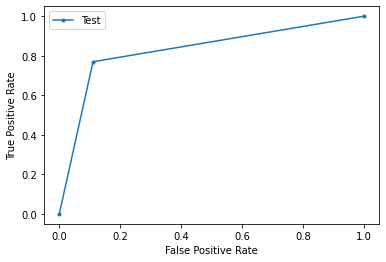

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

fpr, tpr, thrhld = roc_curve(y_test, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [17]:
print(roc_auc_score(y_test, predicted))

0.82956


In [18]:
sep_def = test
sep_def['Predicted'] = predicted
sorted_def = sep_def.sort_values(by='Predicted')

sorted_def_pos = sorted_def[sorted_def['Predicted'] == 1]
sorted_def_neg = sorted_def[sorted_def['Predicted'] == 0]

sorted_def_pos[:15]

,Name,Text,Tag,Rate,Tag_Num,Predicted
18312,1463_4.txt,"It opens - and for half an hour, runs - like a...",NEG,4,0,1
21010,1462_1.txt,"This movie was pretentious, foppish and just d...",NEG,1,0,1
15630,7678_2.txt,"This movie is scary at times, perhaps no more ...",NEG,2,0,1
22723,9975_4.txt,"I was expecting ""Born to Kill"" to be an exciti...",NEG,4,0,1
19126,256_4.txt,"On Humphrey Bogart's first trip to Hollywood, ...",NEG,4,0,1
22137,8881_4.txt,then the second half of this movie is hard to ...,NEG,4,0,1
24750,1571_4.txt,The film was disappointing. I saw it on Broadw...,NEG,4,0,1
23895,7587_4.txt,I do not generally appreciate light-weight att...,NEG,4,0,1
24704,6871_3.txt,"And one only, in my opinion.<br /><br />That r...",NEG,3,0,1
19615,4352_1.txt,"This is the slowest ""film noir"" film I've ever...",NEG,1,0,1


In [19]:
sorted_def_neg[:15]

,Name,Text,Tag,Rate,Tag_Num,Predicted
24999,11634_3.txt,Two years after leaving the small town of Grov...,NEG,3,0,0
17386,7792_3.txt,The title is from a passage in the Bible (Deut...,NEG,3,0,0
17385,8372_1.txt,This really is by far the worst movie I've eve...,NEG,1,0,0
17384,5740_4.txt,"I suggest that in the future, any movie made b...",NEG,4,0,0
17383,9563_2.txt,It goes without saying that a modicum of allow...,NEG,2,0,0
17382,2974_1.txt,To soccer fans every where -- stay away from t...,NEG,1,0,0
17381,8618_2.txt,"This movie ""Vampires: The Turning"" isn't even ...",NEG,2,0,0
17379,2966_2.txt,"No matter what you've heard, ""Fame"" is not a g...",NEG,2,0,0
9934,3917_10.txt,This was the greatest movie I have ever seen i...,POS,10,1,0
17378,10626_1.txt,Big spoiler right here: this film is B!A!D! Bu...,NEG,1,0,0


In [20]:
def metrics(y_t, y_p):
  TP = score([test['Tag_Num'] == 1 & test['Predicted'] == 1]).shape[0]
  TN = score([test['Tag_Num'] == 0 & test['Predicted'] == 0]).shape[0]
  FP = score([test['Tag_Num'] == 0 & test['Predicted'] == 1]).shape[0]
  FN = score([test['Tag_Num'] == 1 & test['Predicted'] == 0]).shape[0]
  return TP, TN, FP, FN

def accuracy(y_t, y_p):
  TP, TN, FP, FN = metrics(y_t, y_p)
  return (TP + TN)/(TP + TN + FP + FN)

def precision(y_t, y_p):
  TP, TN, FP, FN = metrics(y_t, y_p)
  return TP/(TP + FP)

def recall(y_t, y_p):
  TP, TN, FP, FN = metrics(y_t, y_p)
  return TP/(TP + FN)

def get_f(y_t, y_p):
  R = recall(y_t, y_p)
  PR = precision(y_t, y_p)
  return 2 * PR * R / (PR + R)

In [21]:
TP = test[(test['Tag_Num'] == 1) & (test['Predicted'] == 1)].shape[0]
TN = test[(test['Tag_Num'] == 0) & (test['Predicted'] == 0)].shape[0]
FP = test[(test['Tag_Num'] == 1) & (test['Predicted'] == 0)].shape[0]
FN = test[(test['Tag_Num'] == 0) & (test['Predicted'] == 1)].shape[0]

In [22]:
print(TP + TN + FP + FN)

25000


In [25]:
def stats(tp,tn,fp,fn):
  precis = tp/(tp + fp)
  rec = tp/(tp + fn)
  f2 = 2 * (precis * rec)/(precis + rec)
  acc = (tp + tn)/(tp + tn + fp + fn)
  return precis, rec, acc

stats(TP, TN, FP, FN)

(0.77, 0.8741258741258742, 0.82956)